# Exploratory Data Analysis

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [17]:
############################################################
# Load the cleaned dataset
# This dataset is a combination of Kaggle and FiveThirtyEight Elo ratings
# and includes additional features like points and plus-minus statistics.
############################################################
cleaned_df = pd.read_csv('../data/processed/cleaned_combined_kaggle_538_elo.csv')

select_columns = cleaned_df.columns[cleaned_df.columns.str.contains('elo|pts|plus_minus')]
cleaned_df[select_columns].describe()

,pts_home,plus_minus_home,pts_away,plus_minus_away,elo_pre_538,elo_post_538
count,27506.000000,27506.00000,27506.000000,27506.00000,27506.000000,27506.000000
mean,99.554025,3.54130,97.686178,-3.54130,1503.836785,1503.802915
std,13.022658,13.07286,12.533150,13.07286,116.653477,117.032649
min,49.000000,-58.00000,53.000000,-68.00000,1118.111700,1114.233000
25%,91.000000,-6.00000,89.000000,-12.00000,1419.446425,1419.049700
50%,99.000000,4.00000,97.000000,-4.00000,1510.344600,1510.231350
75%,108.000000,12.00000,106.000000,6.00000,1590.392900,1590.473150
max,168.000000,68.00000,162.000000,58.00000,1815.691800,1822.288100


In [25]:
nColumns = cleaned_df[select_columns].columns
print(f"Number of columns: {len(nColumns)}")

Number of columns: 23


In [23]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = round((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


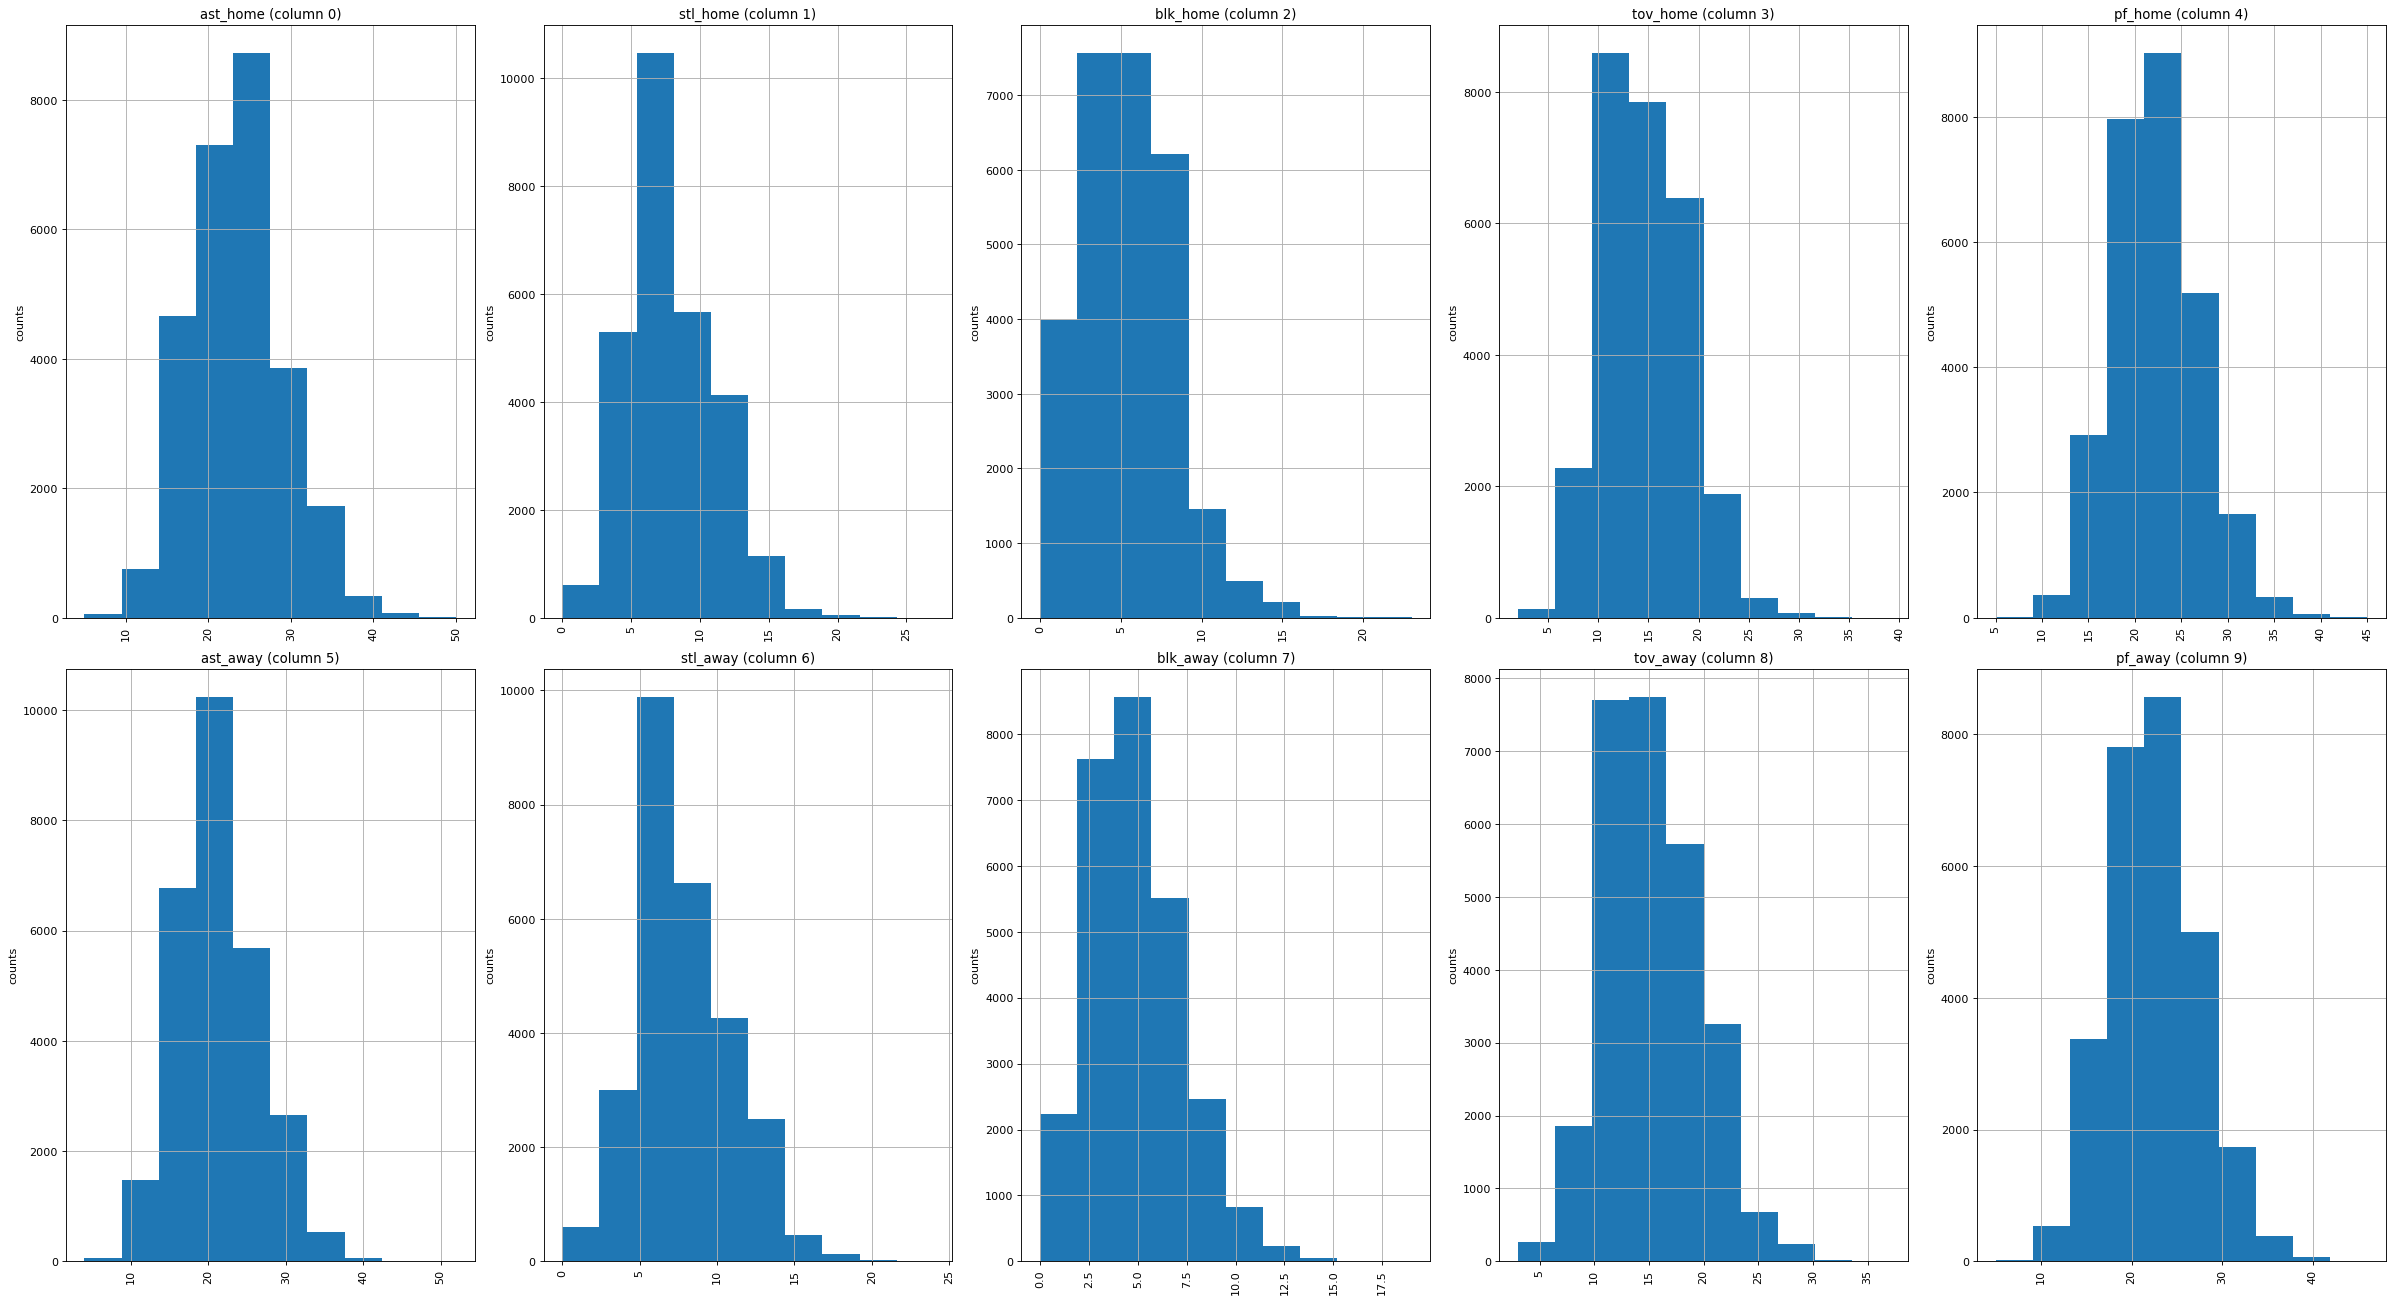

In [24]:
select_columns = ["pts_home", "pts_away", "plus_minus_home", "plus_minus_away", "fg_pct_home", "fg_pct_away", "fg3_pct_home", 
                                    "fg3_pct_away", "ft_pct_home", "ft_pct_away", 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 
                                    'pf_home', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away', 'pf_away', 'elo_pre_538']
distribut_df = cleaned_df[select_columns]
plotPerColumnDistribution(distribut_df, nGraphShown=20, nGraphPerRow=5)

## Boxplots

In [73]:
cleaned_df.columns

Index(['game_id', 'TEAM_ABBREVIATION', 'pts_home', 'team_abbreviation_away',
       'season_id', 'team_id_home', 'wl_home', 'fgm_home', 'fga_home',
       'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home', 'ftm_home',
       'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home',
       'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'plus_minus_home', 'team_id_away', 'team_name_away', 'matchup_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'date_game', 'elo_pre_538',
       'elo_post_538', 'is_playoffs', 'month', 'year', 'day'],
      dtype='object')

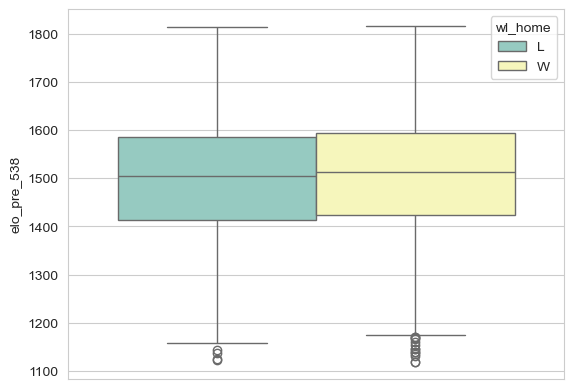

In [77]:
sns.set_style("whitegrid")
ax = sns.boxplot(hue="wl_home", y="elo_pre_538", data=cleaned_df, palette="Set3")

/var/folders/xq/z90fxfv513nfkp28682x0phh0000gn/T/ipykernel_55179/2231878307.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wl_home", y="fgm_home", data=cleaned_df, palette="Set3")


<Axes: xlabel='wl_home', ylabel='fgm_home'>

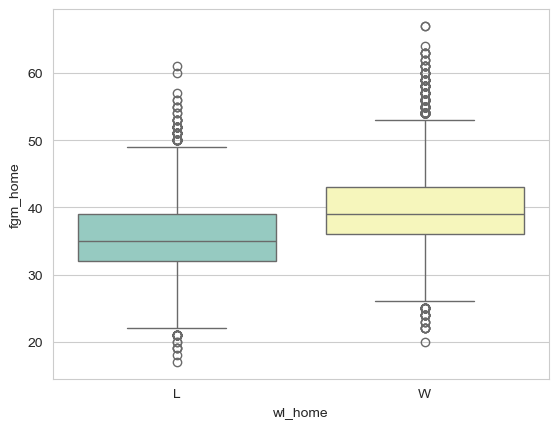

In [78]:
sns.boxplot(x="wl_home", y="fgm_home", data=cleaned_df, palette="Set3")

/var/folders/xq/z90fxfv513nfkp28682x0phh0000gn/T/ipykernel_55179/1210030375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wl_home", y="ft_pct_home", data=cleaned_df, palette="Set3")


<Axes: xlabel='wl_home', ylabel='ft_pct_home'>

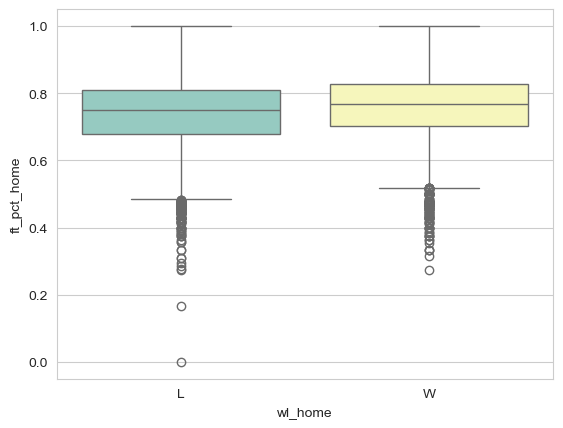

In [79]:
sns.boxplot(x="wl_home", y="ft_pct_home", data=cleaned_df, palette="Set3")

<Axes: ylabel='reb_home'>

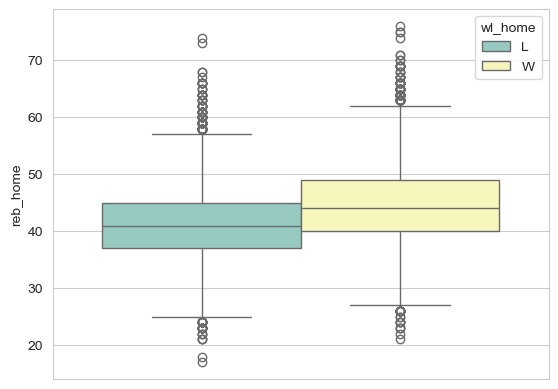

In [81]:
sns.boxplot(hue="wl_home", y="reb_home", data=cleaned_df, palette="Set3")

## ELO for each team over time

In [58]:
cleaned_df = cleaned_df.set_index('game_date')
cleaned_df.index = pd.to_datetime(cleaned_df.index)
cleaned_df['month'] = [x for x in cleaned_df.index.month]
cleaned_df['year'] = [x for x in cleaned_df.index.year]
cleaned_df['day'] = [x for x in cleaned_df.index.day]

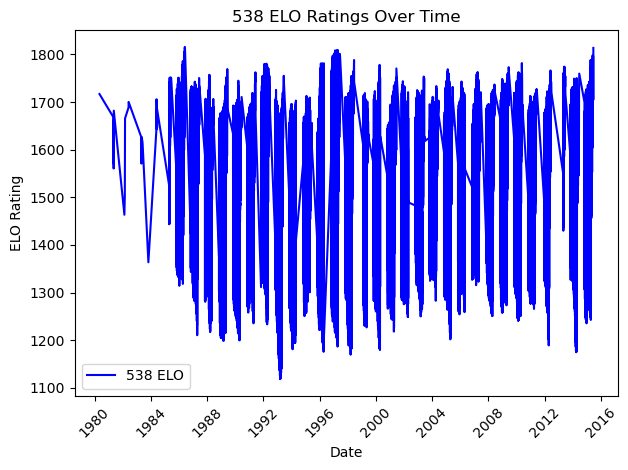

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [59]:
# Plot
plt.plot(cleaned_df.index, cleaned_df['elo_pre_538'], label='538 ELO', color='blue')
plt.legend()
plt.title('538 ELO Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('ELO Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))


In [72]:
np.random.seed(42)
df_plot = cleaned_df[['year', 'TEAM_ABBREVIATION', 'elo_pre_538']].groupby(['year', 'TEAM_ABBREVIATION']).mean()[['elo_pre_538']].reset_index()
teams = df_plot['TEAM_ABBREVIATION'].unique()
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(teams), replace=False)

# Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(teams):
    if i > 0:        
        plt.plot('year', 'elo_pre_538', data=df_plot[df_plot['TEAM_ABBREVIATION'] == y], color=colors[i], label=y)
#        if y == 2018:
#            plt.text(df_plot.loc[df_plot.TEAM_ABBREVIATION==y, :].shape[0]+0.3, df_plot.loc[df_plot.TEAM_ABBREVIATION==y, 'elo_pre_538'][-1:].values[0], y, fontsize=12, color=colors[i])
    else:
        plt.text(df_plot.loc[df_plot.TEAM_ABBREVIATION==y, :].shape[0]+0.1, df_plot.loc[df_plot.TEAM_ABBREVIATION==y, 'elo_pre_538'][-1:].values[0], y, fontsize=12, color=colors[i])

# Setting labels
plt.gca().set(ylabel= '538 ELO', xlabel = 'Year')
plt.yticks(fontsize=12, alpha=.7)
plt.title("ELO Over time", fontsize=20)
plt.ylabel('538 ELO')
plt.xlabel('Year')
plt.show()

## Correlation matrix

In [82]:
def plot_correlation_matrix(df, title='Correlation Matrix', figsize=(10, 8)):
    """
    Plots a correlation matrix for the given DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data to analyze.
    title (str): Title of the plot.
    figsize (tuple): Size of the figure.

    Returns:
    None
    """
    plt.figure(figsize=figsize)
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

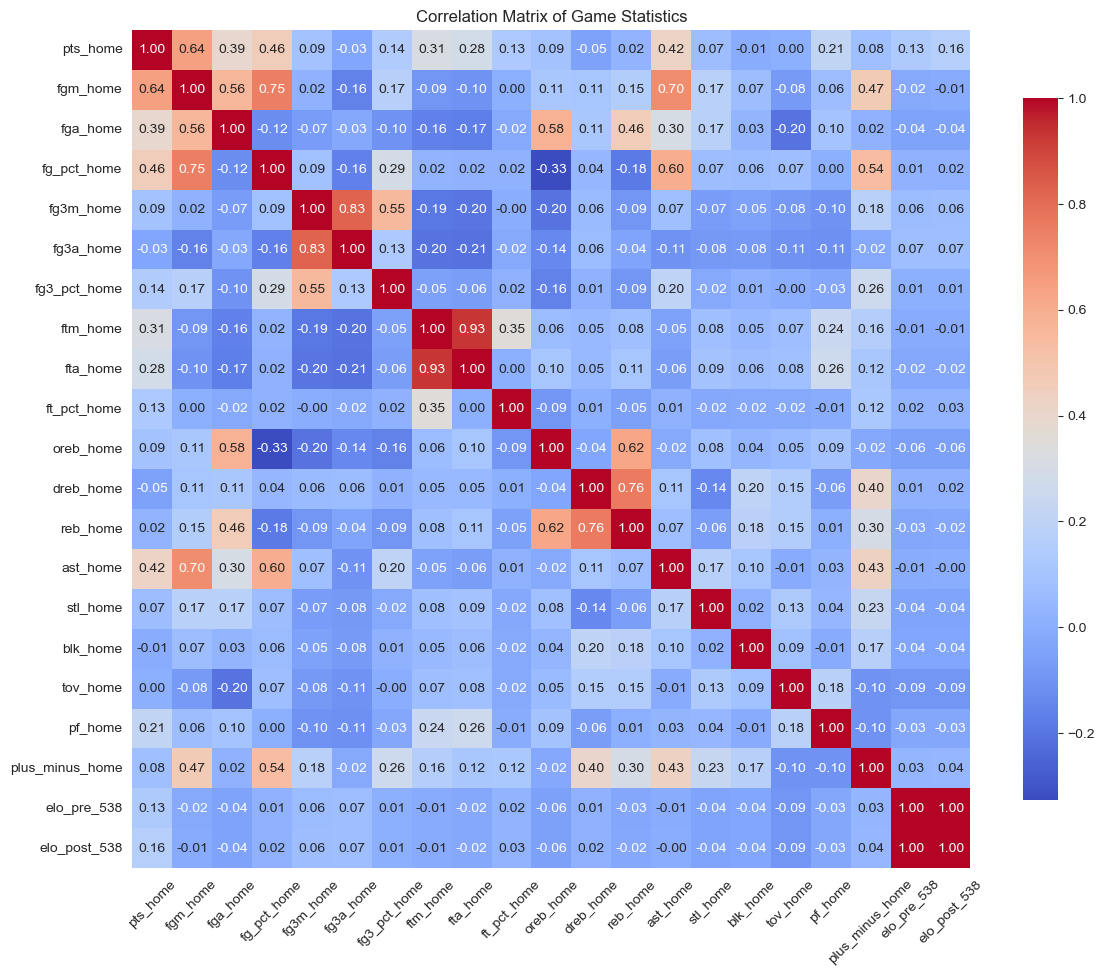

In [85]:
corr_df = cleaned_df[['pts_home',
       'fgm_home', 'fga_home',
       'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home', 'ftm_home',
       'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home',
       'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'plus_minus_home',
       'elo_pre_538',
       'elo_post_538']]

plot_correlation_matrix(corr_df, title='Correlation Matrix of Game Statistics', figsize=(12, 10))